# Defining PV System Components

In [1]:
# Import the particular module of the pvlib library
from pvlib import pvsystem

# CEC PV Module Database
cec_mod_db = pvsystem.retrieve_sam('CECmod')

# Size of the database
print(cec_mod_db.shape)

(25, 21535)


In [2]:
import numpy as np
print(cec_mod_db.iloc[:, np.random.randint(0, high=len(cec_mod_db))])

Technology            Mono-c-Si
Bifacial                      0
STC                    175.0914
PTC                       151.2
A_c                         1.3
Length                    1.576
Width                     0.825
N_s                          72
I_sc_ref                   5.17
V_oc_ref                  43.99
I_mp_ref                   4.78
V_mp_ref                  36.63
alpha_sc               0.002146
beta_oc               -0.159068
T_NOCT                     49.9
a_ref                  1.981696
I_L_ref                5.175703
I_o_ref                     0.0
R_s                    0.316688
R_sh_ref             287.102203
Adjust                16.057121
gamma_r                 -0.5072
BIPV                          N
Version       SAM 2018.11.11 r2
Date                   1/3/2019
Name: Ablytek_5MN6C175_A0, dtype: object


In [3]:
# Sandia PV Module Database
sandia_mod_db = pvsystem.retrieve_sam('sandiamod')

# Dimensions
print(sandia_mod_db.shape)

(42, 523)


In [4]:
# Accessing the characteristics of one of the modules randomly
print(sandia_mod_db.iloc[:, np.random.randint(0, high=len(sandia_mod_db))])

Vintage                                                      2002 (E)
Area                                                            0.657
Material                                                      Si-Film
Cells_in_Series                                                    39
Parallel_Strings                                                    1
Isco                                                              3.4
Voco                                                             20.7
Impo                                                              3.0
Vmpo                                                             16.8
Aisc                                                         0.000552
Aimp                                                         0.000216
C0                                                              0.951
C1                                                              0.049
Bvoco                                                          -0.098
Mbvoc               

In [5]:
# PV module data from a typical datasheet (e.g. Kyocera Solar KD225GX LPB)
module_data = {'celltype': 'multiSi', # technology
               'STC': 224.99, # STC power
               'PTC': 203.3, # PTC power
               'v_mp': 29.8, # Maximum power voltage
               'i_mp': 7.55, # Maximum power current
               'v_oc': 36.9, # Open-circuit voltage
               'i_sc': 8.18, # Short-circuit current
               'alpha_sc': 0.001636, # Temperature Coeff. Short Circuit Current [A/C]
               'beta_voc': -0.12177, # Temperature Coeff. Open Circuit Voltage [V/C]
               'gamma_pmp': -0.43, # Temperature coefficient of power at maximum point [%/C]
               'cells_in_series': 60, # Number of cells in series
               'temp_ref': 25}  # Reference temperature conditions

In [6]:
#definition of a PV Inverter
invdb = pvsystem.retrieve_sam('CECInverter')
print(invdb.shape)

(16, 3264)


In [7]:
# Accessing the characteristics of one of the modules randomly
inverter_data = invdb.iloc[:, np.random.randint(0, high=len(invdb))]

print(inverter_data)

Vac                          240
Pso                     1.843781
Paco                       300.0
Pdco                  312.004578
Vdco                        45.0
C0                     -0.000035
C1                     -0.000227
C2                     -0.000526
C3                     -0.041214
Pnt                         0.09
Vdcmax                      60.0
Idcmax                  6.933435
Mppt_low                    30.0
Mppt_high                   60.0
CEC_Date                     NaN
CEC_Type     Utility Interactive
Name: ABB__MICRO_0_3HV_I_OUTD_US_240__240V_, dtype: object


# I-V Characteristics Curve

In [14]:
# Import the pvlib library
import pvlib

In [15]:
pip install NREL-PySAM

     ---------------------------------------- 33.8/33.8 MB 2.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [16]:
# 1st step: Estimating the parameters for the CEC single diode model
""" WARNING - This function relies on NREL's SAM tool. So PySAM, its Python API, needs to be installed 
in the same computer. Otherwise, you can expect the following error: 'ImportError if NREL-PySAM is not installed.'
"""
cec_fit_params = pvlib.ivtools.sdm.fit_cec_sam(module_data['celltype'], module_data['v_mp'], module_data['i_mp'],
                                  module_data['v_oc'], module_data['i_sc'], module_data['alpha_sc'],
                                  module_data['beta_voc'], module_data['gamma_pmp'], 
                                  module_data['cells_in_series'], module_data['temp_ref'])

# Let's have a look to the output
print(cec_fit_params)

(8.202934970033095, 1.0116474533318072e-10, 0.35799019877176264, 127.68099994564776, 1.471122011098777, 1.0522774079781079)


In [17]:
# Effective irradiance values (W/m2)
irrad = np.array([200,400,600,800,1000])
# Average cell temperature (degrees Celsius)
temp_cell = np.array([40, 40, 40, 40, 40])

# 2nd step: Apply model to estimate the 5 parameters of the single diode equation using the CEC model
diode_params = pvlib.pvsystem.calcparams_cec(irrad, temp_cell, module_data['alpha_sc'], cec_fit_params[4], 
                                            cec_fit_params[0], cec_fit_params[1], cec_fit_params[3], 
                                            cec_fit_params[2], cec_fit_params[5])

# The result of the function returns a Tuple of 5 parameters to be used in the single diode equation
print('Number of elements returned: ', len(diode_params))

Number of elements returned:  5


In [18]:
# Let's have a look to the tuple:
print(diode_params)

(array([1.64544335, 3.2908867 , 4.93633004, 6.58177339, 8.22721674]), array([1.11964887e-09, 1.11964887e-09, 1.11964887e-09, 1.11964887e-09,
       1.11964887e-09]), 0.35799019877176264, array([638.40499973, 319.20249986, 212.80166658, 159.60124993,
       127.68099995]), array([1.54513452, 1.54513452, 1.54513452, 1.54513452, 1.54513452]))


odict_keys(['i_sc', 'v_oc', 'i_mp', 'v_mp', 'p_mp', 'i_x', 'i_xx', 'v', 'i'])


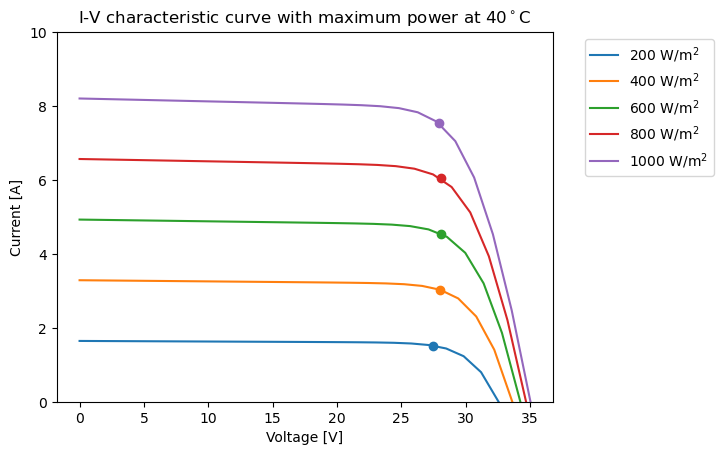

In [20]:
# Importing our library for plotting and visualization
import matplotlib.pyplot as plt

# We iterate over voltage
for i in range(len(irrad)):
    plt.plot(iv_values1['v'][i], iv_values1['i'][i], label=str(irrad[i])+' W/m$^2$')
    plt.scatter(iv_values1['v_mp'][i], iv_values1['i_mp'][i])
# Add the title, axis labels and legend: 
plt.title('I-V characteristic curve with maximum power at 40$^\circ$C')
plt.xlabel('Voltage [V]')
plt.ylabel('Current [A]')
plt.ylim(0, 10)
plt.legend(bbox_to_anchor=(1.05, 1), ncol=1)

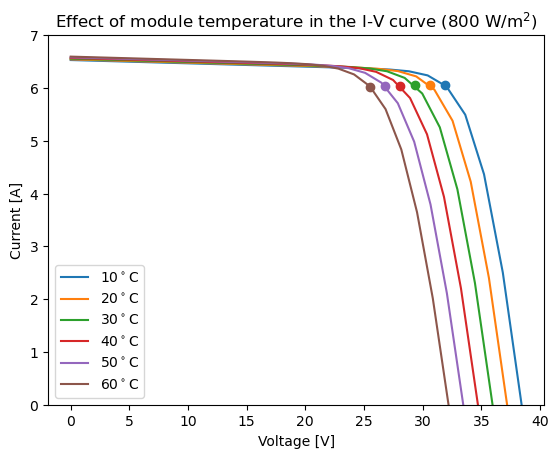

In [21]:
# Effective irradiance values (W/m2)
irrad = np.array([800, 800, 800, 800, 800, 800])
# Average cell temperature (degrees Celsius)
temp_cell = np.array([10, 20, 30, 40, 50, 60])

# Repeating the process from before:
# Estimate the 5 parameters of the single diode equation using the CEC model
diode_params = pvlib.pvsystem.calcparams_cec(irrad, temp_cell, module_data['alpha_sc'], cec_fit_params[4], 
                                            cec_fit_params[0], cec_fit_params[1], cec_fit_params[3], 
                                            cec_fit_params[2], cec_fit_params[5])

# Estimate I-V characteristic using the Single Diode Equation
iv_values2 = pvlib.pvsystem.singlediode(diode_params[0], 
                                        diode_params[1], 
                                        diode_params[2], 
                                        diode_params[3], 
                                        diode_params[4], 
                                        ivcurve_pnts=25,   # Number of points of the I-V curve (equally distributed)
                                        method='lambertw') # I-V using the Lambert W. function

# Plotting the results
for i in range(len(irrad)):
    plt.plot(iv_values2['v'][i], iv_values2['i'][i], label=str(temp_cell[i])+'$^\circ$C')
    plt.scatter(iv_values2['v_mp'][i], iv_values2['i_mp'][i])
# Add the title, axis labels and legend: 
plt.title('Effect of module temperature in the I-V curve (800 W/m$^2$)')
plt.xlabel('Voltage [V]')
plt.ylabel('Current [A]')
plt.ylim(0, 7)
plt.legend(ncol=1)

# Irradiance to DC power conversion

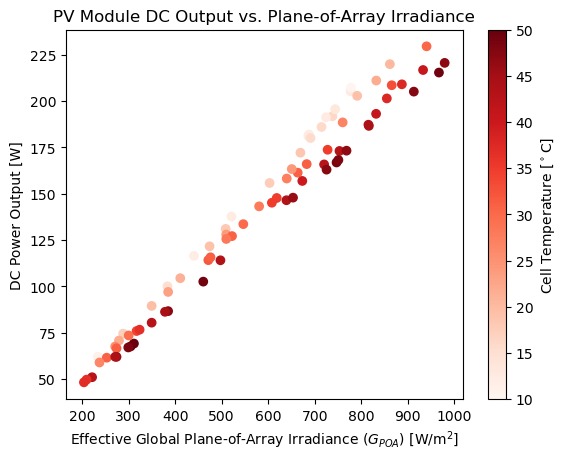

In [22]:
# Randomly define a set of Effective Irradiance and cell temperature values:

# Global plane-of-array effective irradiance between 200 and 1000 W/m2
g_poa_effective = np.random.uniform(low=200, high=1000, size=(80,))
# Mean cell temperature values between 10 and 50 degrees Celsius
temp_cell = np.random.uniform(low=10, high=50, size=(80,)) 

# Definition of PV module characteristics:
pdc0 = 250 # STC power
gamma_pdc = -0.0045 # The temperature coefficient in units of 1/C

# Estimate DC power with PVWatts model
dc_power = pvlib.pvsystem.pvwatts_dc(g_poa_effective, temp_cell, pdc0, gamma_pdc, temp_ref=25.0)

# Let's visualize the DC power output as function of the effective irradiance
plt.scatter(g_poa_effective, dc_power, c=temp_cell, vmin=10, vmax=50, cmap='Reds')
cbar = plt.colorbar()
cbar.set_label('Cell Temperature [$^\circ$C]')
plt.title('PV Module DC Output vs. Plane-of-Array Irradiance')
plt.xlabel('Effective Global Plane-of-Array Irradiance ($G_{POA}$) [W/m$^2$]')
plt.ylabel('DC Power Output [W]')
plt.show()

# DC to AC power conversion (inverter models)

In [23]:
# The DataFrame with the technical characteristics of the PV inverter
inverter_data.keys()

Index(['Vac', 'Pso', 'Paco', 'Pdco', 'Vdco', 'C0', 'C1', 'C2', 'C3', 'Pnt',
       'Vdcmax', 'Idcmax', 'Mppt_low', 'Mppt_high', 'CEC_Date', 'CEC_Type'],
      dtype='object')

In [24]:
# The dictionary with the current and voltage values
iv_values1.keys()

odict_keys(['i_sc', 'v_oc', 'i_mp', 'v_mp', 'p_mp', 'i_x', 'i_xx', 'v', 'i'])

In [25]:
# Estimate AC power from DC power using the Sandia Model
ac_power = pvlib.inverter.sandia(iv_values1['v_mp'], # DC voltage input to the inverter
                                 iv_values1['p_mp'], # DC power input to the inverter
                                 inverter_data) # Parameters for the inverter 
# Estimated Power Output
ac_power

array([ 39.02985685,  81.14290801, 122.60045179, 163.0136791 ,
       202.21049108])

In [26]:
# Let's check the start DC power required for the inversion process (or self-consumption of the inverter)
inverter_data['Pso']

1.843781